In [1]:
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# REQUIRED PACKAGES: "basemap" (CL: conda install -c conda-forge basemap)
#---------------------------------------------------------------------------
#The below packages are used to plot data against maps and geographical images
from mpl_toolkits.basemap import Basemap
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [2]:
#Color settings
t_colors=["#FF4892", #winery
         "#FFD966", #brewery
         "#99D9FF" #distillery
         ]

te_colors=["#610B21", #winery
          "#5C4400", #brewery
          "#004065" #distillery
          ]

In [3]:
csv_path="google_sample.csv"

In [4]:
google_df=pd.read_csv(csv_path)

In [5]:
type_state=google_df
type_state=type_state.iloc[:,[6,2,3,4,5]]
type_state.head()
type_state=type_state.rename(columns={"name":"counter"})
type_state["counter"]=1
type_state_pivot=type_state.pivot_table(index="state",columns="est",values="counter", aggfunc="sum")
state_counts=type_state_pivot
state_counts=state_counts.reset_index()
state_counts.reset_index()
state_counts.columns
state_counts=state_counts.iloc[:,[0,1,2,3]]

In [6]:
state_list=[]
for i in range(len(state_counts["state"])):
    state_list.append(state_counts.state[i])

list_states=pd.DataFrame(state_list)
list_states.reset_index()
list_states.columns
list_states=list_states.rename(index=str, columns={0:"state"})
list_states=list_states["state"]

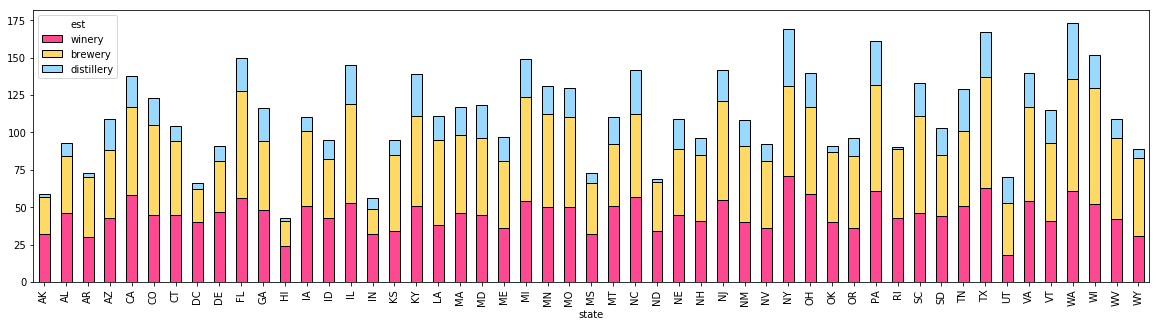

In [7]:
type_state_pivot
ts_bar= type_state_pivot.loc[:,["winery","brewery","distillery"]].plot.bar(stacked=True, color=t_colors, edgecolor="black", linewidth="1", 
                                                                           aa=True, figsize=(20,5))
ts_bar.figure.savefig("est_state.png", dpi=600)

In [8]:
map_df=type_state
temp_join=map_df
temp_join.index.names=["state"]

In [9]:
mean_lat=pd.DataFrame(temp_join.groupby(["state"])["lat"].mean()).reset_index()
mean_lon=pd.DataFrame(temp_join.groupby(["state"])["lon"].mean()).reset_index()
mean_lon_lat=pd.merge(mean_lat,mean_lon, on="state")

mean_lon_lat=mean_lon_lat.rename(columns={"lat":"mean_lat","lon":"mean_lon"})
mean_lon_lat=mean_lon_lat.set_index("state")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'state' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'state' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  


In [10]:
new_map=map_df.set_index("state")

new_map=new_map.join(new_map,lsuffix="_new_map", rsuffix="_mean_lon_lat")
new_map.head()
map_plot=new_map.iloc[:,[0,1,2,3]]
map_plot=map_plot.rename(columns={"est_new_map":"est","counter_new_map":"counter","lon_new_map":"lon","lat_new_map":"lat"})

In [24]:
map_group=map_plot.reset_index()
map_group=pd.DataFrame(map_group.groupby(["state","est","lat","lon"])["counter"].sum()).reset_index()
map_group=map_group.drop_duplicates(subset=["state","est","counter"],keep="last")
map_group.head()


,state,est,lat,lon,counter
24,AK,brewery,64.958130,-147.621400,59
26,AK,distillery,42.873430,-78.872637,59
58,AK,winery,64.909219,-148.313635,59
96,AL,brewery,34.801656,-87.668968,93
105,AL,distillery,34.749632,-86.708440,93


In [46]:
w_mapping=map_group.loc[map_group["est"]=="winery",:]
b_mapping=map_group.loc[map_group["est"]=="brewery",:]
d_mapping=map_group.loc[map_group["est"]=="distillery",:]

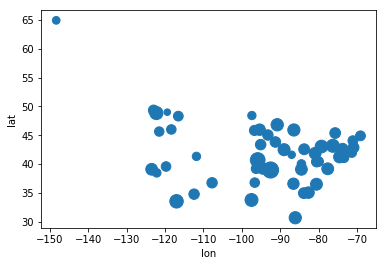

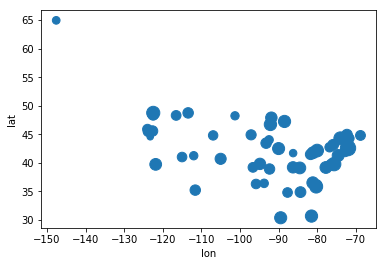

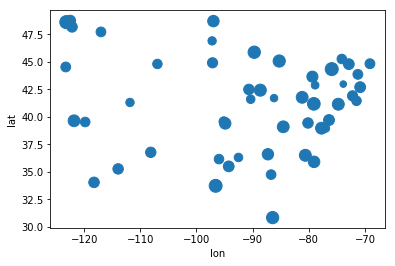

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


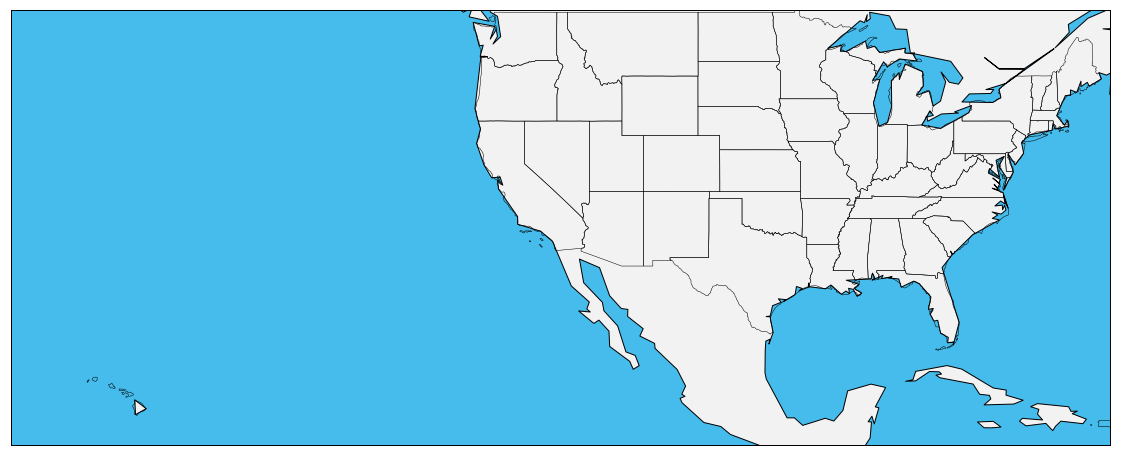

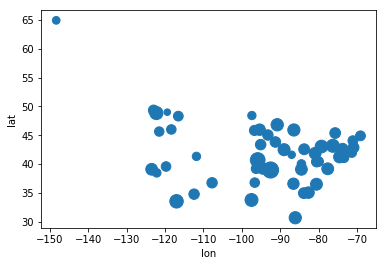

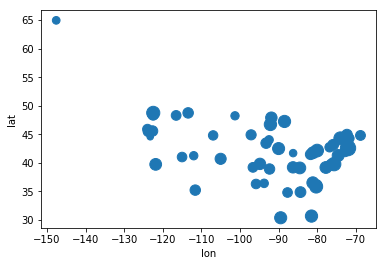

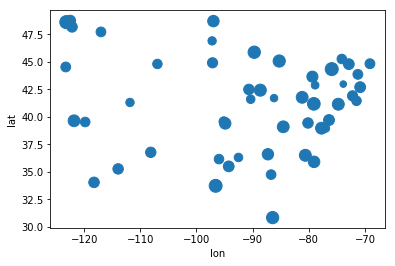

In [54]:
lon = map_df["lon"]
lat = map_df["lat"]
#size = (counter/1000) ** 2 + 3
fig,ax = plt.subplots(figsize=(20,8))


#Continential US and Hawaii mapping from http://boundingbox.klokantech.com:
#westlimit=-162.27; southlimit=16.31; eastlimit=-66.12; northlimit=49.11

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=49.11, lon_0=-162.27,
            llcrnrlon=-167.27, llcrnrlat= 16.31, urcrnrlon=-66.12, urcrnrlat=49.11)


m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("us_shapefiles/us_shapefile", "area")
df_poly = pd.DataFrame({
        "shapes": [Polygon(np.array(shape), True) for shape in m.area]
    })

w_mapping.plot(kind="scatter", x="lon",y="lat", s=w_mapping["counter"])
b_mapping.plot(kind="scatter", x="lon",y="lat", s=b_mapping["counter"])
d_mapping.plot(kind="scatter", x="lon",y="lat", s=d_mapping["counter"])

0    -89.786913
1    -86.655497
2    -87.903644
3    -81.200250
4   -149.861021
Name: lon, dtype: float64

In [21]:
map_df.head()

,est,counter,lon,lat
0,winery,1,-89.786913,38.490559
1,winery,1,-86.655497,33.351166
2,winery,1,-87.903644,30.522471
3,winery,1,-81.200250,40.557340
4,winery,1,-149.861021,61.112783
